## Project Stage - II (Data Modeling)

## Goals

The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be graphically comparing how different states are doing with respect to opioid mortality rate. And you will be also analysing county based information for different states in the US.


Dataset:

We are going to use historical dataset here for opioid related mortality from 1999 -2019 for different causes of death. Extracted from:
- https://wonder.cdc.gov/wonder/help/ucd.html#Drug/Alcohol%20Induced%20Causes
- File: `./data/1999-2020_Drug_Overdose_By_Category.csv`

### Tasks:

#### Task 1: (100 pts)
- Team: (40)
    - **T1.1** Import the historical data from: `./data/1999-2020_Drug_Overdose_By_Category.xls` (10 pts)
        - Identify peaks in US Opioid Mortality
            - Normalize the mortality by population
            - Calculate mean for states and then mean for US per year
            - Plot a line graph 
                - https://plotly.com/python/line-charts/
        - Discuss why there was a peak
    - **T1.2** Identify trends in states (10 pts)
         - Identify top 5 states which are increasing in their opioid numbers
         - Identify top 5 states which are reducing their opioid numbers
         
    - **T1.3** Plot a graph of the aforementioned states (T1.2) in a line graph (10 pts)
         - Two graphs with 5 lines each representing the states.
    
    - **T1.4** Plot a scatter plot graph of normalized mortality by state with respect to the log of the population.
         - Groupby county
         - Groupby state
         - https://plotly.com/python/line-and-scatter/
         - Color code the dots by the state.

    
- Member: (60 pts)
    - **M1.1** Understand the distribution and measures of center for US opioid mortality for 2019 (20 pts)
         - Import the super dataframe created in Stage I
         - Create a histogram of Normalized Deaths variable for entire US as a distribution. 
             - https://plotly.com/python/histograms/#histograms-with-gohistogram
             - https://plotly.com/python/histograms/
         - Add a vertical line to the histogram representing the ***mean*** Normalized Opioid Death for US. 
             - You should be able to do that with `fig.add_vline()`
             - https://plotly.com/python/horizontal-vertical-shapes/
         - Add another line for ***median*** to compare
    - **M1.2** Understand variable to mortality relationships for 2019 data (40 pts)
        - Here we codify the column Normalized Deaths (Number of Deaths per 100k Population - `Norm_Deaths`) and store it as a `label` column. (10 pts)
            - The codification is based on the quantile distribution of the Normalized deaths. i.e.
                - Very Low (v_low) - [1.999 - 8.0]
                - Low (low) - [8.0 - 11.0]
                - High (high) - [11.0 - 16.0]
                - Very High (v_high) - [16.0 - 64.0]
        - Now try the variables you have identified in Stage I and plot them as a second variable to Normalized Mortality in a scatter plot to observe any trends. (20 pts)
            - For example, if you said population was a indicator, then used population values as the your `y` in scatter plot where `x` is your Normalized Mortality
        - Describe any trends you observe. (10 pts)
        - ***Extra credit (additional 20 pts)***
            - Develop the above approach as a Plotly widget for jupyter, where you can try out the variables dynamically in a simple dashboard. The variables can be in a dropdown. 
            - https://plotly.com/python/figurewidget-app/

**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Discuss the results as a team. Put together a presentation of your findings, record it via zoom, and upload the recording to canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage V. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

T1.4 Plot a scatter plot graph of normalized mortality by state with respect to the log of the population.

Groupby county
Groupby state
https://plotly.com/python/line-and-scatter/
Color code the dots by the state.

<b>Importing the required packages</b>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image

<b>Reading the csv file</b>

In [2]:
data = pd.read_csv("../../../data/stage_2/1999-2020_Drug_Overdose_By_Category.csv")
data

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,1999-2000.txt,NaN,"Jefferson County, AL",1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8
1,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5
2,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable
3,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0
4,1999-2000.txt,NaN,"Mobile County, AL",1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0
...,...,...,...,...,...,...,...,...,...,...,...
90902,2005-2009.txt,NaN,"Washakie County, WY",56043,2008,2008,All other non-drug and non-alcohol causes,O9,89,8229,1081.5
90903,2005-2009.txt,NaN,"Weston County, WY",56045,2005,2005,All other non-drug and non-alcohol causes,O9,71,6594,1076.7
90904,2005-2009.txt,NaN,"Weston County, WY",56045,2006,2006,All other non-drug and non-alcohol causes,O9,70,6717,1042.1
90905,2005-2009.txt,NaN,"Weston County, WY",56045,2007,2007,All other non-drug and non-alcohol causes,O9,79,7033,1123.3


<b>Calculating the mortality rate (Norm_Deaths) by normalizing the deaths by population per 100000</b>

In [3]:
data["Norm_Deaths"] = (data["Deaths"]/data["Population"]*100000).round()
data

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths
0,1999-2000.txt,NaN,"Jefferson County, AL",1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8,4.0
1,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5,5.0
2,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable,2.0
3,1999-2000.txt,NaN,"Jefferson County, AL",1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0,3.0
4,1999-2000.txt,NaN,"Mobile County, AL",1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90902,2005-2009.txt,NaN,"Washakie County, WY",56043,2008,2008,All other non-drug and non-alcohol causes,O9,89,8229,1081.5,1082.0
90903,2005-2009.txt,NaN,"Weston County, WY",56045,2005,2005,All other non-drug and non-alcohol causes,O9,71,6594,1076.7,1077.0
90904,2005-2009.txt,NaN,"Weston County, WY",56045,2006,2006,All other non-drug and non-alcohol causes,O9,70,6717,1042.1,1042.0
90905,2005-2009.txt,NaN,"Weston County, WY",56045,2007,2007,All other non-drug and non-alcohol causes,O9,79,7033,1123.3,1123.0


https://datascienceparichay.com/article/pandas-split-column-by-delimiter/

<b>Splitting the County column to separate state information from county and storing in separate columns</b>

In [4]:
# Spliting the county column using str.split() using the delimeter ","
# expand = True saves the values into different columns. If we do not do it then it will save the values in a list
data[["County", "State"]] = data["County"].str.split(",",expand = True)
# stripping the extra space before the state values
data["State"] = data["State"].str.lstrip()
data

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State
0,1999-2000.txt,NaN,Jefferson County,1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8,4.0,AL
1,1999-2000.txt,NaN,Jefferson County,1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5,5.0,AL
2,1999-2000.txt,NaN,Jefferson County,1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable,2.0,AL
3,1999-2000.txt,NaN,Jefferson County,1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0,3.0,AL
4,1999-2000.txt,NaN,Mobile County,1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0,5.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90902,2005-2009.txt,NaN,Washakie County,56043,2008,2008,All other non-drug and non-alcohol causes,O9,89,8229,1081.5,1082.0,WY
90903,2005-2009.txt,NaN,Weston County,56045,2005,2005,All other non-drug and non-alcohol causes,O9,71,6594,1076.7,1077.0,WY
90904,2005-2009.txt,NaN,Weston County,56045,2006,2006,All other non-drug and non-alcohol causes,O9,70,6717,1042.1,1042.0,WY
90905,2005-2009.txt,NaN,Weston County,56045,2007,2007,All other non-drug and non-alcohol causes,O9,79,7033,1123.3,1123.0,WY


<b> Taking natural log of population columns and storing the values in a different column log_pop</b>

In [5]:
data["log_pop"] = np.log(data["Population"])
data

C:\Users\Manish\anaconda_new\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State,log_pop
0,1999-2000.txt,NaN,Jefferson County,1073,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,25,662845,3.8,4.0,AL,13.404296
1,1999-2000.txt,NaN,Jefferson County,1073,2000,2000,Drug poisonings (overdose) Unintentional (X40-...,D1,30,662047,4.5,5.0,AL,13.403092
2,1999-2000.txt,NaN,Jefferson County,1073,2000,2000,Drug poisonings (overdose) Suicide (X60-X64),D2,14,662047,Unreliable,2.0,AL,13.403092
3,1999-2000.txt,NaN,Jefferson County,1073,2000,2000,All other drug-induced causes,D9,20,662047,3.0,3.0,AL,13.403092
4,1999-2000.txt,NaN,Mobile County,1097,1999,1999,Drug poisonings (overdose) Unintentional (X40-...,D1,20,399323,5.0,5.0,AL,12.897526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90902,2005-2009.txt,NaN,Washakie County,56043,2008,2008,All other non-drug and non-alcohol causes,O9,89,8229,1081.5,1082.0,WY,9.015420
90903,2005-2009.txt,NaN,Weston County,56045,2005,2005,All other non-drug and non-alcohol causes,O9,71,6594,1076.7,1077.0,WY,8.793915
90904,2005-2009.txt,NaN,Weston County,56045,2006,2006,All other non-drug and non-alcohol causes,O9,70,6717,1042.1,1042.0,WY,8.812397
90905,2005-2009.txt,NaN,Weston County,56045,2007,2007,All other non-drug and non-alcohol causes,O9,79,7033,1123.3,1123.0,WY,8.858369


<b>Checking the describe to see for the above error of divide by zero</b>

<br>

<b>It shows that the errors are in the values of Norm_Deaths and log_pop</b>

In [6]:
data.describe()

,Notes,County Code,Year,Year Code,Deaths,Population,Norm_Deaths,log_pop
count,0.0,90907.000000,90907.000000,90907.000000,90907.000000,9.090700e+04,90907.0,9.090700e+04
mean,NaN,29957.985249,2010.879591,2010.879591,568.447600,2.415846e+05,inf,-inf
std,NaN,15370.320046,5.832504,5.832504,1842.016231,6.103313e+05,NaN,NaN
min,NaN,1001.000000,1999.000000,1999.000000,10.000000,0.000000e+00,0.0,-inf
25%,NaN,18029.000000,2006.000000,2006.000000,33.000000,1.701150e+04,19.0,9.741645e+00
50%,NaN,29179.000000,2011.000000,2011.000000,144.000000,5.348800e+04,860.0,1.088721e+01
75%,NaN,42129.000000,2016.000000,2016.000000,415.000000,2.019710e+05,1120.0,1.221588e+01
max,NaN,56045.000000,2020.000000,2020.000000,78155.000000,1.017029e+07,inf,1.613498e+01


Dropping null and infinite values from a row

<b>Checking for infinite values in Norm_Deaths using np.inf</b>

In [7]:
data[data["Norm_Deaths"]  == np.inf]

,Table Names,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_Deaths,State,log_pop
1219,2017-2020.txt,NaN,Valdez-Cordova Census Area,2261,2020,2020,All other non-drug and non-alcohol causes,O9,54,0,0.0,inf,AK,-inf


Dropping the row with the given row index

In [8]:
# labels indicate the row index, axis =0 indicate row value and inplace = True indicates do it in the main dataset
data.drop(labels = 1219, axis=0,inplace = True)

<b>Grouping the data by County and State and taking the mean values of Norm_Deaths and log_pop</b>
- Here mean is necessary because if we use sum then all the population for each county over the period of 2 decades will add up which is not good.
<br><br>
<b>Here, I am grouping the data by State also because there are many counties with same names in different states, so to separate them by state and also to color code by State I am using grouping by on State</b>

In [9]:
data_county = data.groupby(["County","State"], as_index = False)[["Norm_Deaths","log_pop","Population"]].mean()
data_county

,County,State,Norm_Deaths,log_pop,Population
0,Abbeville County,SC,1087.100000,10.141616,25385.250000
1,Acadia Parish,LA,728.068966,11.020795,61144.586207
2,Accomack County,VA,1299.850000,10.436564,34125.400000
3,Ada County,ID,175.708333,12.893524,401427.791667
4,Adair County,IA,1433.700000,8.932566,7583.700000
...,...,...,...,...,...
3129,Yuma County,AZ,273.250000,12.183724,196167.057692
3130,Yuma County,CO,1022.600000,9.207855,9976.250000
3131,Zapata County,TX,636.800000,9.523722,13699.600000
3132,Zavala County,TX,800.000000,9.376290,11807.450000


This shows that, from 1999 - 2020, Abbeville County has an average of 1087.1 normalized deaths and log pop of 10.14. Similarly, it can be implied for all counties.

<b>Plotting the plotly plot with Norm_Deaths on x-axis and log_pop on y-axis, color coding by State</b>
<br><br>
The plot shows that there are many dots with same color which indicates the county that belongs to that state

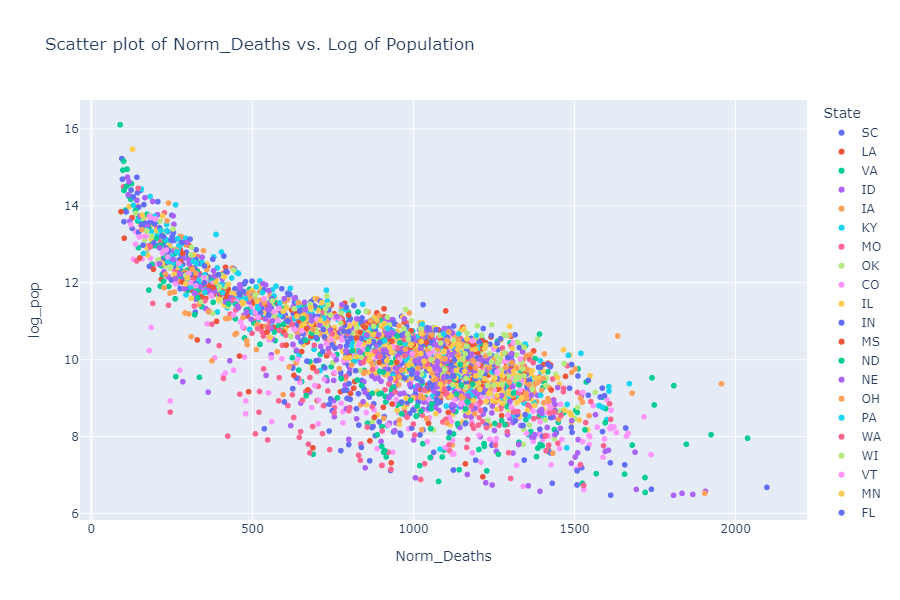

In [10]:
fig = px.scatter(data_county,x= "Norm_Deaths",y = "log_pop",color = "State",title = "Scatter plot of Norm_Deaths vs. Log of Population")
#fig.show()
fig.write_image("stageII_images/scatter_county.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

- The plot shows an inverse kind of relationship between log_pop and Norm_Deaths.It shows a kind of exponentially decreasing relation for all counties as norm death value increases.
- The dots are color coded by States and most of the cases and in the range of norm death value between 700 to 1400 with log population value between 8 to 10.

#### Next Grouping the data by State and taking the mean values of Norm_Deaths and log_pop again

In [11]:
data_state = data.groupby("State", as_index = False)[["Norm_Deaths","log_pop"]].mean()
data_state

,State,Norm_Deaths,log_pop
0,AK,468.255537,9.837788
1,AL,875.530312,10.984584
2,AR,1046.926143,10.297712
3,AZ,307.579247,12.449691
4,CA,269.309476,12.956634
5,CO,523.740741,10.858971
6,CT,257.225806,12.912505
7,DC,171.618557,13.344023
8,DE,312.692737,12.551143
9,FL,427.895559,12.345266


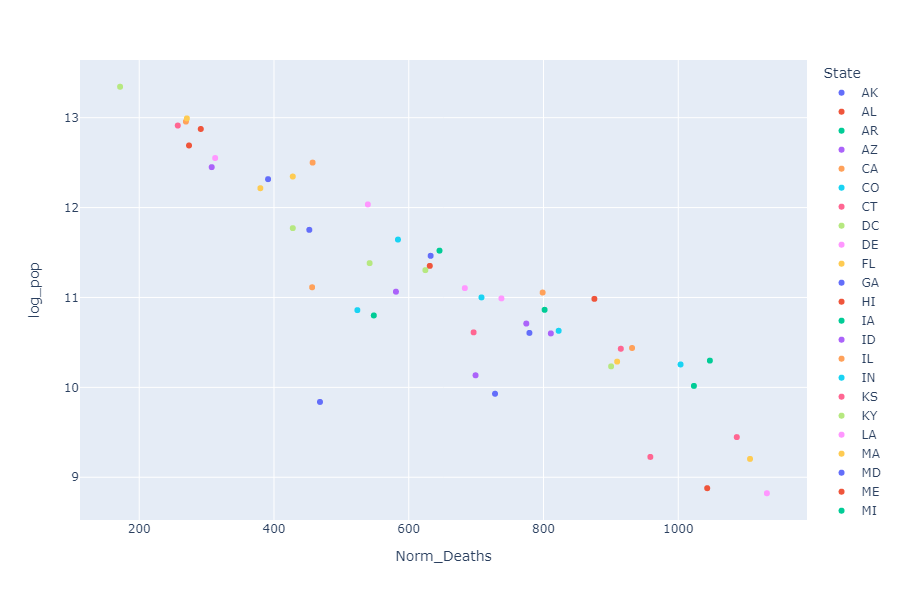

In [12]:
fig = px.scatter(data_state,x= "Norm_Deaths",y = "log_pop",color = "State")
#fig.show()
fig.write_image("stageII_images/scatter_state.png")
img_bytes = fig.to_image(format="png",width=900, height=600)
Image(img_bytes)

- The plot shows the values of norm_deaths values of 50 states given the log of population.
- From the plot, we can see that there exists a negative relationship between the state mortality rate and log of population. It is in sync with the above county based plot.
- The plot also shows that there exists a linear relationship between norm_deaths and log_pop.